In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Funções de ativação
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Dataset fictício (problema de classificação binária)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Entradas
y = np.array([[0], [1], [1], [0]])              # Saídas esperadas (XOR)

# Hiperparâmetros
learning_rate = 0.1
epochs = 10000

# Inicialização dos pesos e viés
np.random.seed(42)
weights_1 = np.random.randn(2, 1)
bias_1 = np.random.randn()
weights_2 = np.random.randn(1, 1)
bias_2 = np.random.randn()

# Treinamento da rede
errors = []
for epoch in range(epochs):
    # Forward pass
    weighted_sum_1 = np.dot(X, weights_1) + bias_1
    output_1 = sigmoid(weighted_sum_1)

    weighted_sum_2 = np.dot(output_1, weights_2) + bias_2
    output_2 = sigmoid(weighted_sum_2)

    # Cálculo do erro
    error = y - output_2
    errors.append(np.mean(np.square(error)))

    # Backpropagation
    d_error = -2 * error / len(X)
    d_output_2 = sigmoid_derivative(weighted_sum_2)
    gradient_2 = d_error * d_output_2

    d_output_1 = sigmoid_derivative(weighted_sum_1)
    gradient_1 = np.dot(gradient_2, weights_2.T) * d_output_1

    # Atualização dos pesos e viés
    weights_2 -= learning_rate * np.dot(output_1.T, gradient_2)
    bias_2 -= learning_rate * np.sum(gradient_2)

    weights_1 -= learning_rate * np.dot(X.T, gradient_1)
    bias_1 -= learning_rate * np.sum(gradient_1)

    # Exibir progresso a cada 1000 épocas
    if epoch % 1000 == 0:
        print(f"Época {epoch}, Erro: {errors[-1]}")

Época 0, Erro: 0.2886287602318518
Época 1000, Erro: 0.2501198180662707
Época 2000, Erro: 0.2499283804534443
Época 3000, Erro: 0.24969580326027913
Época 4000, Erro: 0.2489431874744993
Época 5000, Erro: 0.24627623062778436
Época 6000, Erro: 0.23930587175058526
Época 7000, Erro: 0.22473755362071227
Época 8000, Erro: 0.20524564361919126
Época 9000, Erro: 0.19128085376129117


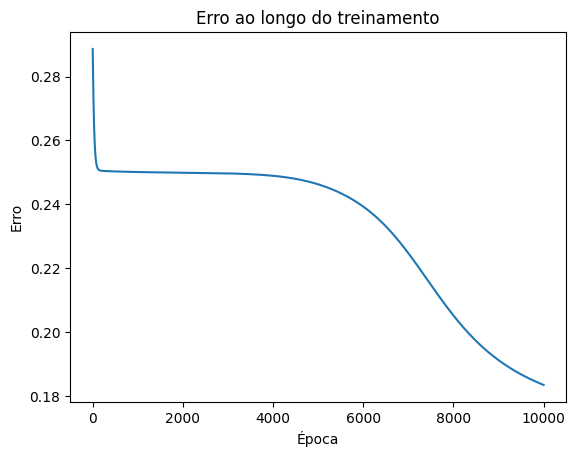


Teste da rede treinada:
Entrada: [0 0], Saída esperada: [0], Saída da rede: [0.17813512]
Entrada: [0 1], Saída esperada: [1], Saída da rede: [0.63569114]
Entrada: [1 0], Saída esperada: [1], Saída da rede: [0.63570031]
Entrada: [1 1], Saída esperada: [0], Saída da rede: [0.66102053]


In [5]:
# Plot do erro ao longo do treinamento
plt.plot(range(epochs), errors)
plt.title("Erro ao longo do treinamento")
plt.xlabel("Época")
plt.ylabel("Erro")
plt.show()

# Teste da rede treinada
print("\nTeste da rede treinada:")
for i in range(len(X)):
    weighted_sum_1 = np.dot(X[i], weights_1) + bias_1
    output_1 = sigmoid(weighted_sum_1)

    weighted_sum_2 = np.dot(output_1, weights_2) + bias_2
    output_2 = sigmoid(weighted_sum_2)

    print(f"Entrada: {X[i]}, Saída esperada: {y[i]}, Saída da rede: {output_2}")
